# EWB paper figure 1: showing all the cases

We provide the exact code used to generate each figure in order to be completely reproducible and to encourage others to use EWB with their own models quickly. 
This is Figure 1, the initial figure that shows all of the cases, both globally and then zoomed in

In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
from mpl_toolkits.axes_grid1 import make_axes_locatable
from extremeweatherbench import evaluate, utils, cases, defaults
from pathlib import Path

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

# ugly hack to load in our plotting scripts
import sys
sys.path.append(basepath + "/docs/notebooks/")
import case_plotting as cp

In [2]:
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()

# turn the dictionary into a list of case objects
ewb_cases = cases.load_individual_cases(case_dict)

# build out all of the expected data to evalate the case
# this will not be a 1-1 mapping with ewb_cases because there are multiple data sources to evaluate for some cases
# for example, a heat/cold case will have both a case operator for ERA-5 data and GHCN
case_operators = cases.build_case_operators(case_dict, defaults.get_brightband_evaluation_objects())

This function is deprecated and will be removed in a future release. Please use cases.load_ewb_events_yaml_into_case_collection instead.
This function is deprecated and will be removed in a future release. Please use cases.read_incoming_yaml instead.


In [3]:
# useful for debugging
print(ewb_cases)


IndividualCaseCollection(cases=[IndividualCase(case_id_number=1, title='2021 Pacific Northwest', start_date=datetime.datetime(2021, 6, 20, 0, 0), end_date=datetime.datetime(2021, 7, 3, 0, 0), location=BoundingBoxRegion(latitude_min=33.25, latitude_max=68.0, longitude_min=215.25, longitude_max=256.0), event_type='heat_wave'), IndividualCase(case_id_number=2, title='2022 Upper Midwest', start_date=datetime.datetime(2022, 5, 7, 0, 0), end_date=datetime.datetime(2022, 5, 17, 0, 0), location=BoundingBoxRegion(latitude_min=19.5, latitude_max=48.25, longitude_min=252.0, longitude_max=276.75), event_type='heat_wave'), IndividualCase(case_id_number=3, title='2022 California', start_date=datetime.datetime(2022, 6, 7, 0, 0), end_date=datetime.datetime(2022, 6, 15, 0, 0), location=BoundingBoxRegion(latitude_min=23.75, latitude_max=44.5, longitude_min=235.75, longitude_max=266.25), event_type='heat_wave'), IndividualCase(case_id_number=4, title='2022 Texas', start_date=datetime.datetime(2022, 6, 30

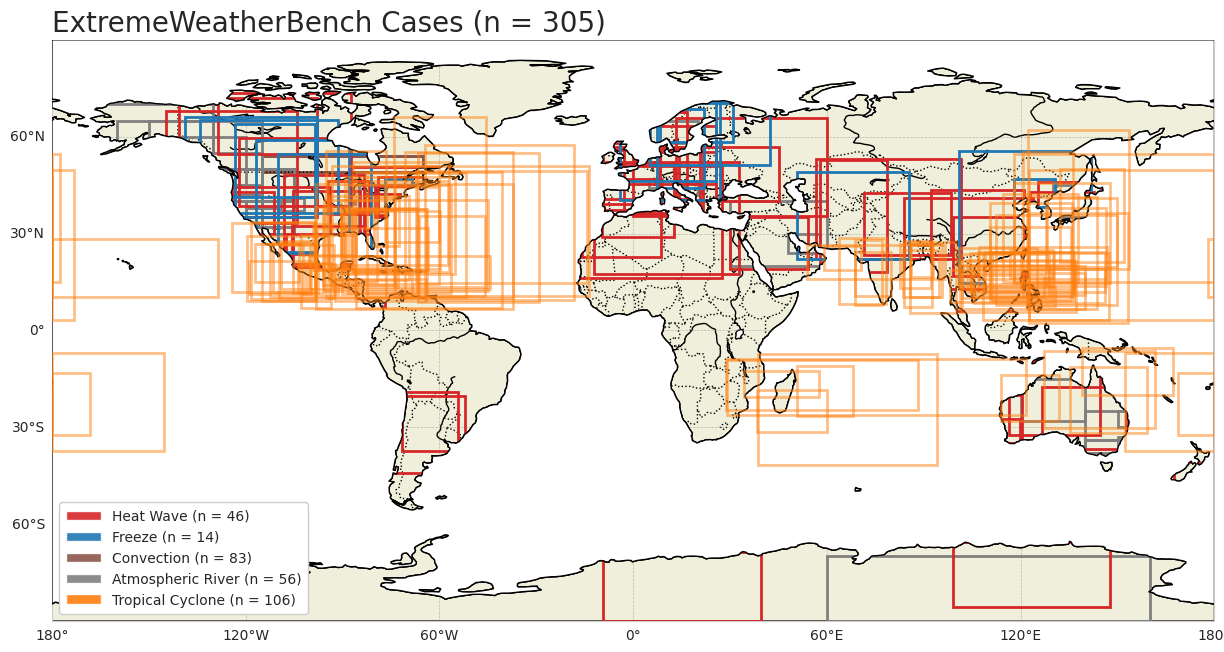

In [19]:
# plot all cases on one giant world map
cp.plot_all_cases(ewb_cases, event_type=None, filename=basepath + 'docs/notebooks/figs/ewb_all.png', fill_boxes=False)

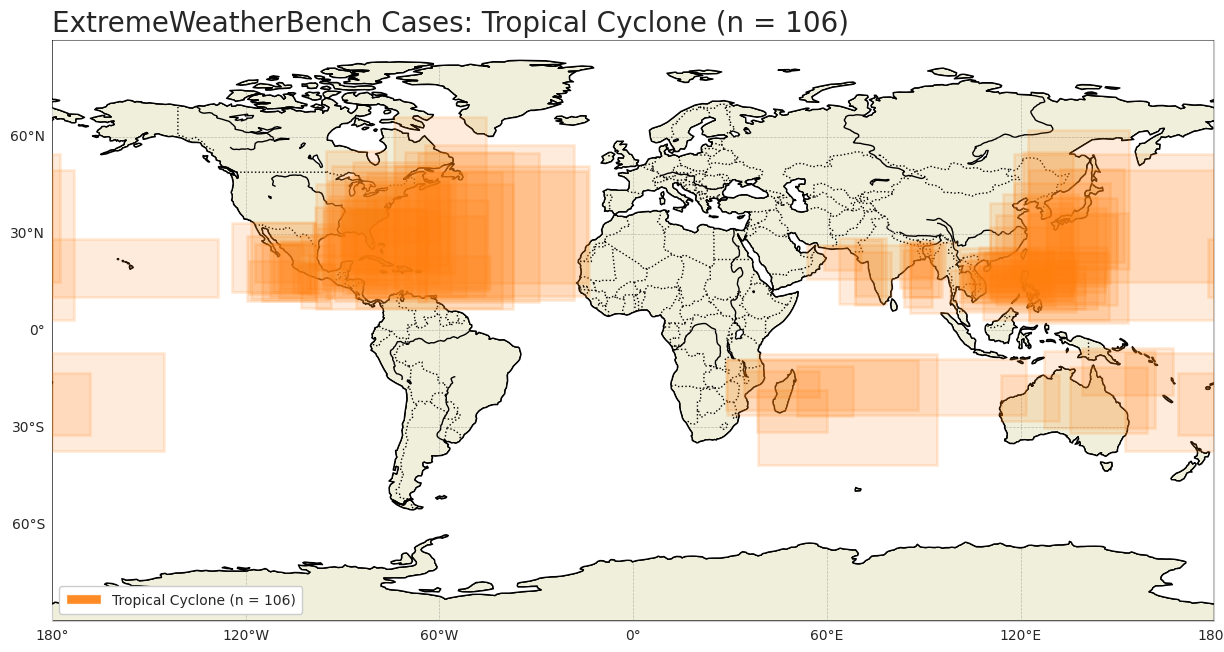

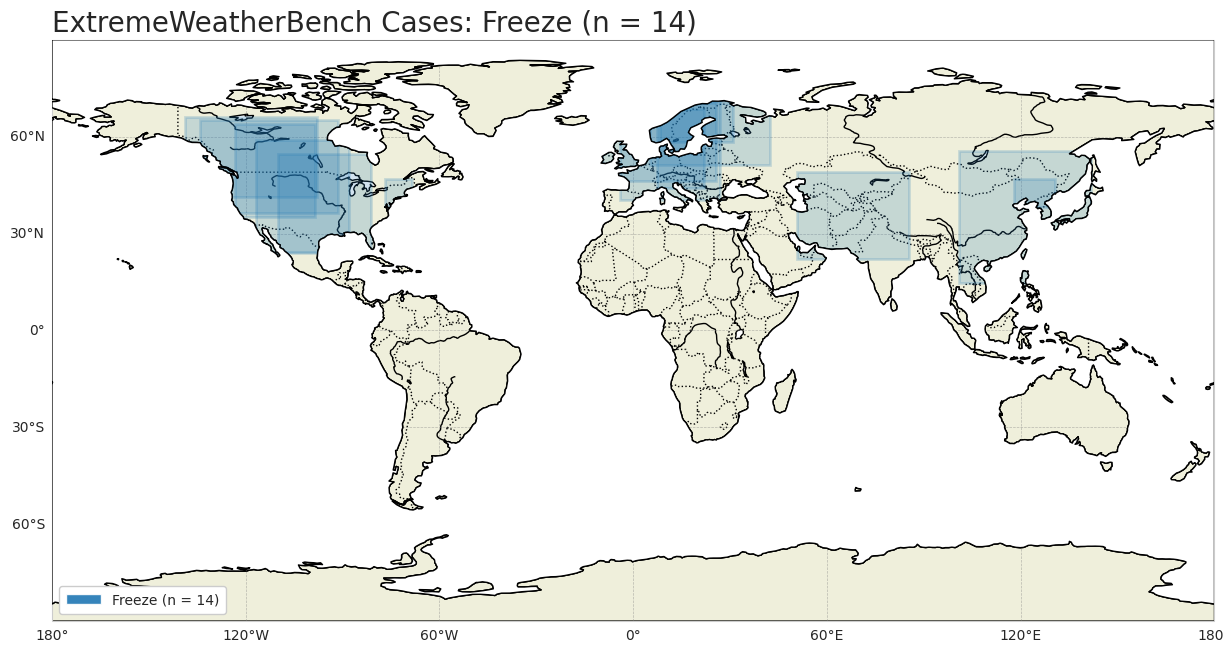

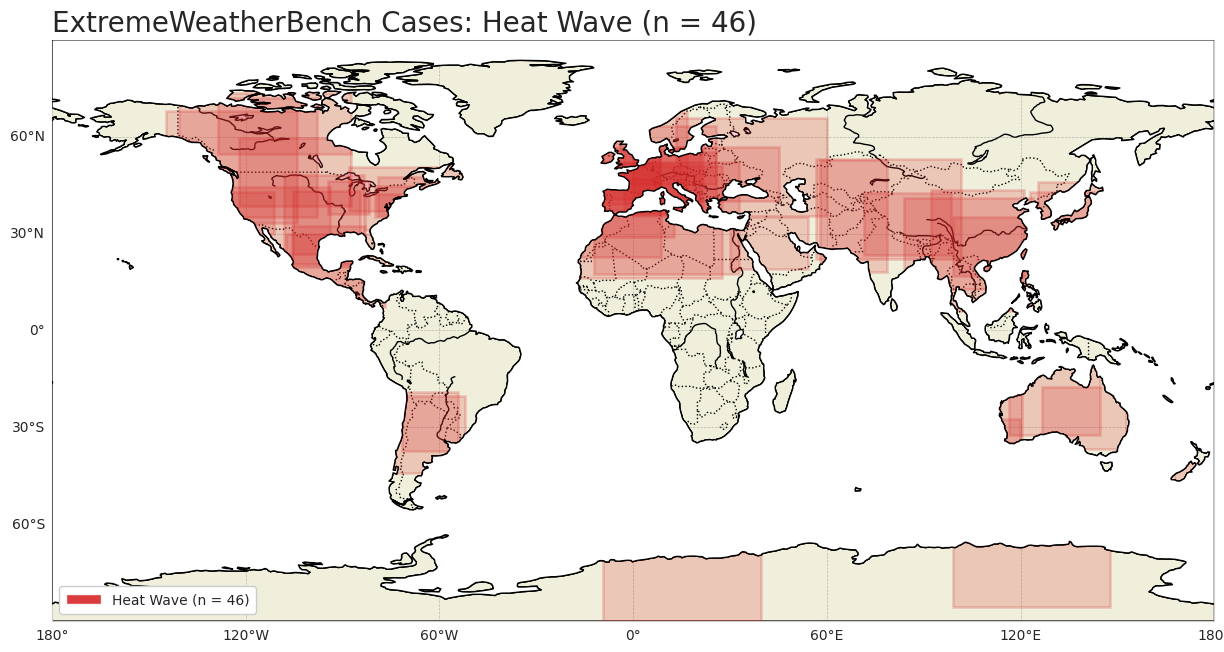

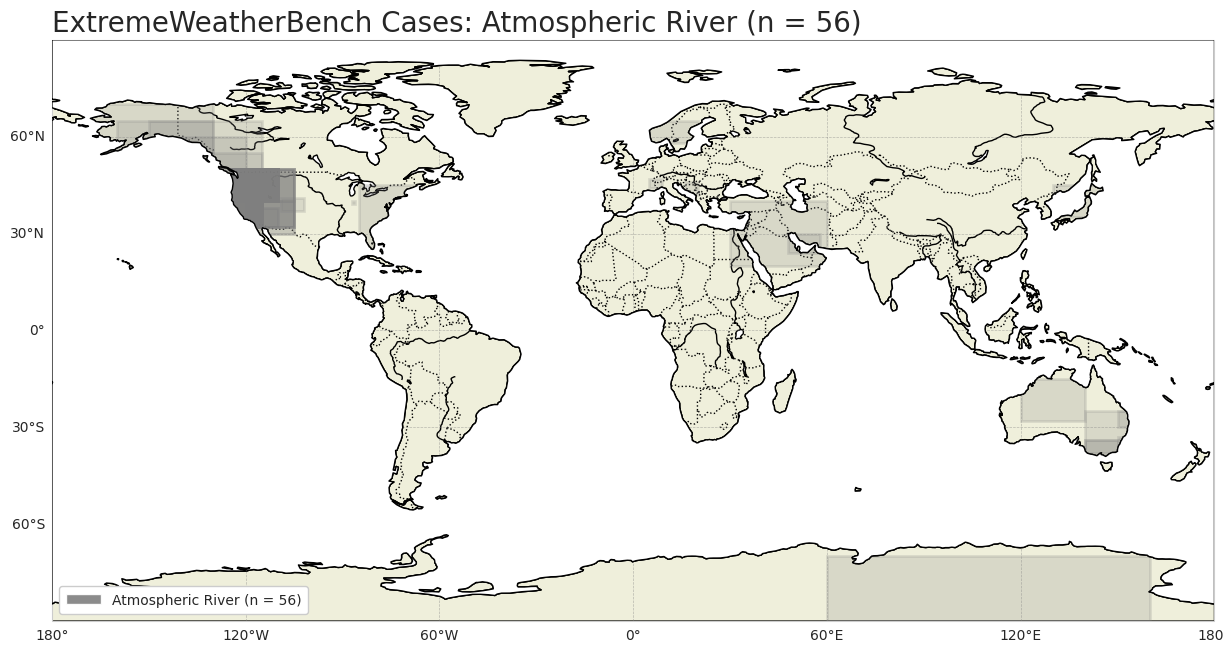

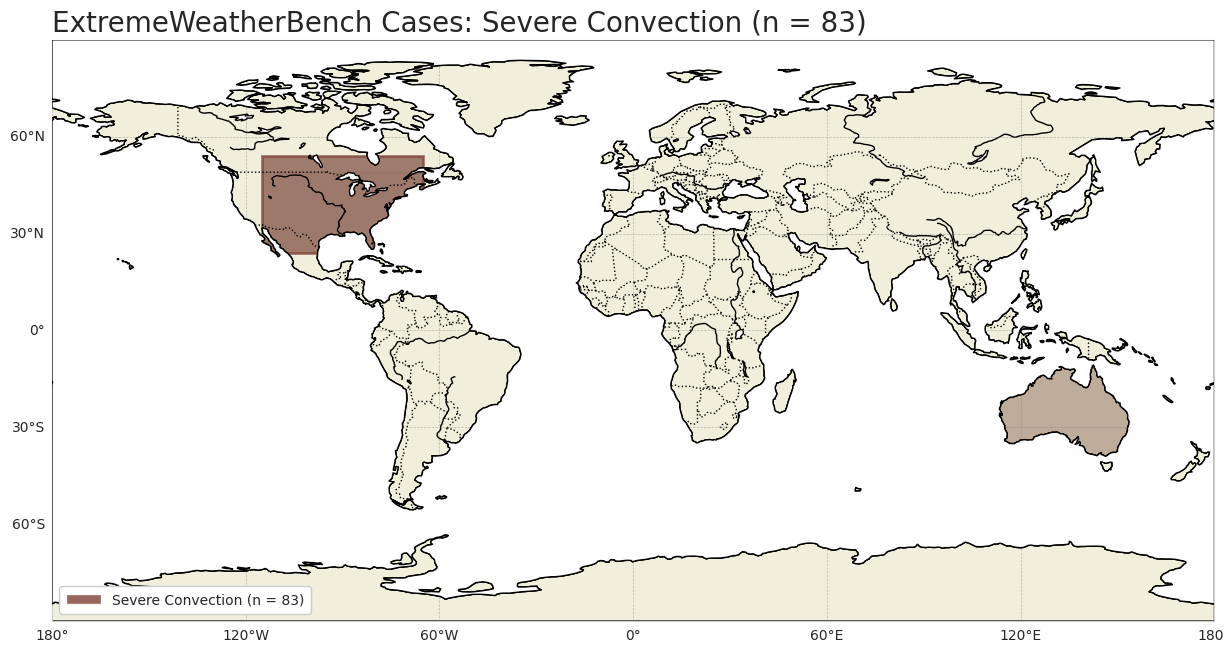

In [16]:
# plot the indivdual cases for each event type
cp.plot_all_cases(ewb_cases, event_type='tropical_cyclone', filename=basepath + 'docs/notebooks/figs/ewb_tcs.png', fill_boxes=True)
cp.plot_all_cases(ewb_cases, event_type='freeze', filename=basepath + 'docs/notebooks/figs/ewb_freeze.png', fill_boxes=True)
cp.plot_all_cases(ewb_cases, event_type='heat_wave', filename=basepath + 'docs/notebooks/figs/ewb_heat.png', fill_boxes=True)
cp.plot_all_cases(ewb_cases, event_type='atmospheric_river', filename=basepath + 'docs/notebooks/figs/ewb_ar.png', fill_boxes=True)
cp.plot_all_cases(ewb_cases, event_type='severe_convection', filename=basepath + 'docs/notebooks/figs/ewb_convective.png', fill_boxes=True)


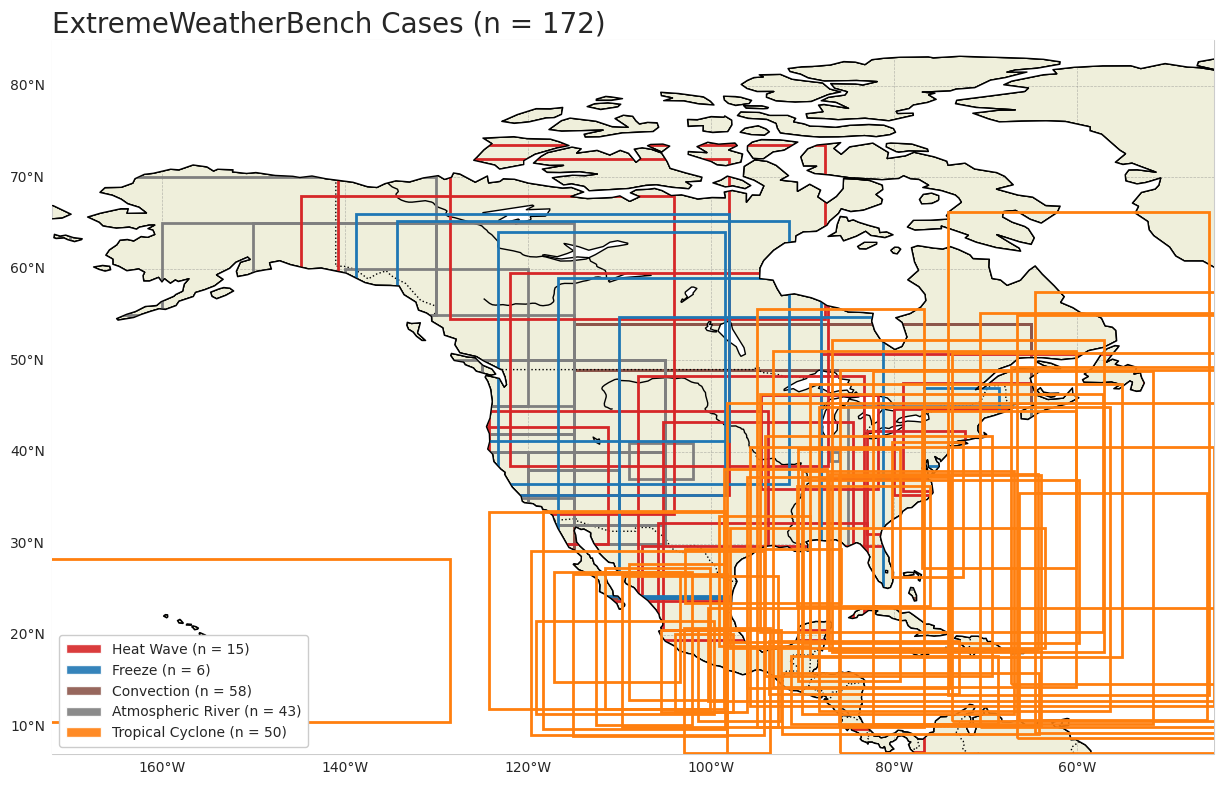

In [7]:
# plot North America
bot_lat = 7
top_lat = 85
left_lon = -172
right_lon = -45

bounding_box = [left_lon, right_lon, bot_lat, top_lat]
plot_title = 'ExtremeWeatherBench Cases in North America'

cp.plot_all_cases(ewb_cases, event_type=None, bounding_box=bounding_box, filename=basepath + 'docs/notebooks/figs/extreme_weather_cases_NA.png', fill_boxes=False)

20 -15 20 75


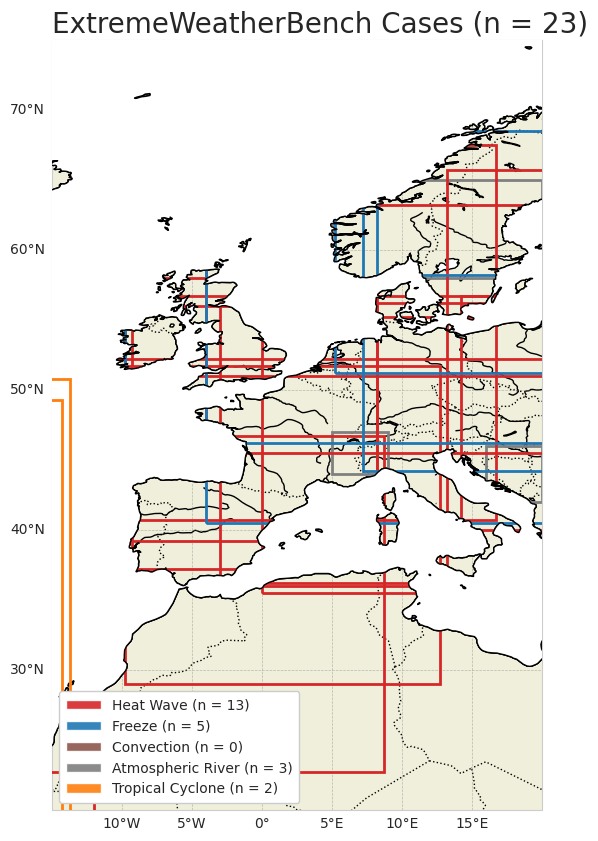

In [8]:
# plot Europe
bot_lat = 20
top_lat = 75
left_lon = -15
right_lon = 20

print(right_lon, left_lon, bot_lat, top_lat)

bounding_box = [left_lon, right_lon, bot_lat, top_lat]
plot_title = 'ExtremeWeatherBench Cases in Europe'
cp.plot_all_cases(ewb_cases, event_type=None, bounding_box=bounding_box, filename=basepath + 'docs/notebooks/figs/extreme_weather_cases_Europe.png', fill_boxes=False)


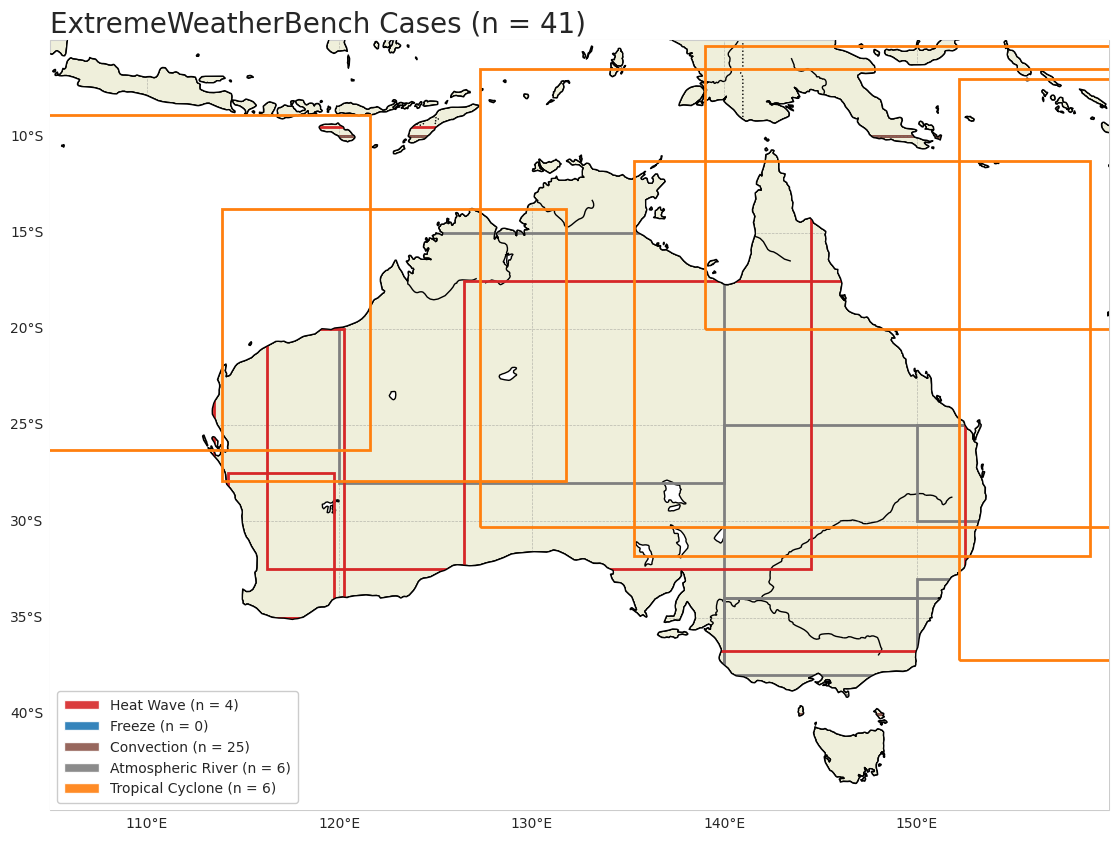

In [9]:
# plot Australia
bot_lat = -45
top_lat = -5
left_lon = 105
right_lon = 160
bounding_box = [left_lon, right_lon, bot_lat, top_lat]
plot_title = 'ExtremeWeatherBench Cases in Australia'

cp.plot_all_cases(ewb_cases, event_type=None, bounding_box=bounding_box, filename=basepath + 'docs/notebooks/figs/extreme_weather_cases_Aus.png', fill_boxes=False)